In [3]:
# Importing useful libraries and supressing the warning messages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append("..")
warnings.filterwarnings('ignore')

In [4]:
# Importing some scripts

from scripts.data_visualization import Data_Viz 
from scripts.data_cleaning import DataCleaner
#from scripts.visualization_logger import logger

DC = DataCleaner()
DV = Data_Viz()

In [5]:
# Importing clean call center data

call_center_clean = pd.read_excel(r'C:\Users\hp\OneDrive - students.jkuat.ac.ke\Desktop\Tiko\call_center_clean.xlsx')
call_center_clean.head()

,Rafiki Id,Call status,Gender,Year of birth,Visited facility,Were you given a tiko card?,Satisfaction,Feedback,Concerns,Notes,Month
0,1920703,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
1,2016625,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
2,2013477,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
3,2016141,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
4,1970498,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June


In [6]:
# Checking unique encounters on call status

call_center_clean['Call status'].unique()

array(['Not reachable', 'No answer', 'Call later', 'Call successful',
       'Wrong recipient', 'Call rejected'], dtype=object)

In [7]:
call_center_clean['Month'].unique()

array(['June', 'February', 'July', 'May'], dtype=object)

In [8]:
call_center_clean['Notes'].unique()

array([nan,
       "The sister uses his number to get tiko services but right now he's away from her for some time"],
      dtype=object)

In [9]:
del call_center_clean['Rafiki Id']
call_center_clean.head()

,Call status,Gender,Year of birth,Visited facility,Were you given a tiko card?,Satisfaction,Feedback,Concerns,Notes,Month
0,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
1,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
2,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
3,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June
4,Not reachable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June


In [10]:
# Statistics summary

call_center_clean.describe(include='all').T

,count,unique,top,freq
Call status,1389,6,Not reachable,1123
Gender,141,2,Female,130
Year of birth,140,3,2004-2009,77
Visited facility,140,2,Yes,124
Were you given a tiko card?,124,2,No,101
Satisfaction,124,2,Yes,123
Feedback,124,5,the services were good,57
Concerns,98,6,no,93
Notes,1,1,The sister uses his number to get tiko service...,1
Month,1389,4,June,1385


Inferences from the above statistics
1. Most calls (1123) were "Not reachable"
2. The female gender topped in seeking the services ie. 130 are Female and 11 are Male
3. The age that recorded the highest number(77, born between 2004-2009) are 15-20 year olds
4. 101 rafikis responded "No" to receiving a tiko card while 23 responded "Yes" to receiving a tiko card
5. About the rafikis who visited the facility, 124 responded "Yes" to visiting a facility and 16 responded "No" to visiting a facility
6. 123 responded "Yes" to being satisfied with the services while only 1 responded "No" to being satisfied
6. Most common feedback was "the services were good" (57 entries)
7. There were minimal concerns about the services offered and Tiko
8. The vast majority of entries (1385) are from June


Exploratory Data Analysis

In [16]:
# Checking the unique values in the Call status field

call_center_clean['Call status'].unique()

array(['Not reachable', 'No answer', 'Call later', 'Call successful',
       'Wrong recipient', 'Call rejected'], dtype=object)

In [30]:
# Filter for successful calls (assuming other entries mean unsuccessful)

successful_calls = call_center_clean[call_center_clean['Call status'] == 'Call successful']

# Calculating the percentage of successful calls

success_rate = (len(successful_calls) / len(call_center_clean)) * 100
print(f"\
Percentage of successful calls: {success_rate:.2f}%")


Percentage of successful calls: 10.15%


In [28]:
# Defining a function to map the year ranges to estimated years
def estimate_year_of_birth(year_range):
    if year_range == '2004-2009':
        return 2006
    elif year_range == '1998-2003':
        return 2000
    elif year_range == 'Before 1998':
        return 1990
    else:
        return None

# Applying the function to create a new column

call_center_clean['Estimated Year of Birth'] = call_center_clean['Year of birth'].apply(estimate_year_of_birth)

# Display the head of the updated dataframe to confirm changes
print(call_center_clean[['Year of birth', 'Estimated Year of Birth']].tail())

     Year of birth  Estimated Year of Birth
1384     2004-2009                   2006.0
1385     2004-2009                   2006.0
1386     1998-2003                   2000.0
1387     2004-2009                   2006.0
1388     2004-2009                   2006.0


In [32]:
# Calculating the age of each Rafiki based on the current year (2024) and the 'Estimated Year of Birth'
current_year = 2024

call_center_clean['Age'] = current_year - call_center_clean['Estimated Year of Birth']

# Filter the dataframe for successful calls
successful_calls = call_center_clean[call_center_clean['Call status'] == 'Call successful']

# Analyze overage Rafikis (age > 19)
overage_rafikis = successful_calls[successful_calls['Age'] > 19]

# Count the number of overage Rafikis
overage_count = overage_rafikis.shape[0]

# Analyze facility visits
facility_visits = successful_calls['Visited facility'].value_counts()

# Analyze notable concerns and feedback
concerns_summary = successful_calls['Concerns'].value_counts().head(10)
feedback_summary = successful_calls['Feedback'].value_counts().head(10)

# Display the results
print("Number of overage Rafikis (age > 19):", overage_count)
print("\
Facility Visits:")
print(facility_visits)
print("\
Top Concerns:")
print(concerns_summary)
print("\
Top Feedback:")
print(feedback_summary)

Number of overage Rafikis (age > 19): 63
Facility Visits:
Visited facility
Yes    124
No      16
Name: count, dtype: int64
Top Concerns:
Concerns
no                                       93
how to redeem tiko miles                  1
where to locate the nearest tiko shop     1
How to redeem tiko miles                  1
0                                         1
NO                                        1
Name: count, dtype: int64
Top Feedback:
Feedback
the services were good              57
the service was good                36
rafiki says the service was good    28
The services were good               2
she was not attended to              1
Name: count, dtype: int64


This indicates that there are 63 Rafikis who are over 18 years old among the successful calls.

The majority of Rafikis who were successfully contacted had visited a facility (124), while only 16 had not.

The most common response for concerns is "no", suggesting that many Rafikis don't have specific concerns. However, some notable concerns include:

How to redeem tiko miles
Where to locate the nearest tiko shop

The feedback is overwhelmingly positive, with most Rafikis reporting that the services were good. However, there is one instance of negative feedback where a Rafiki reported not being attended to.

Key observations:

1. Overage Rafikis: The presence of 63 Rafikis over 19 years old might be a concern, depending on the target demographic of the program. This could indicate a need for age verification or adjustment of the program's focus.

2. Facility Visits: The high number of facility visits (124 out of 140 successful calls) suggests that most Rafikis are actively engaging with the services provided.

3. Concerns: While most Rafikis reported no concerns, the few specific concerns mentioned (redeeming tiko miles, locating tiko shops) could be areas for improvement in communication or service delivery.

4. Feedback: The feedback is predominantly positive, which is encouraging. However, the one instance of a Rafiki not being attended to should be investigated to ensure it's not indicative of a larger issue.

1. Number of Rafikis who haven't visited a facility: 16


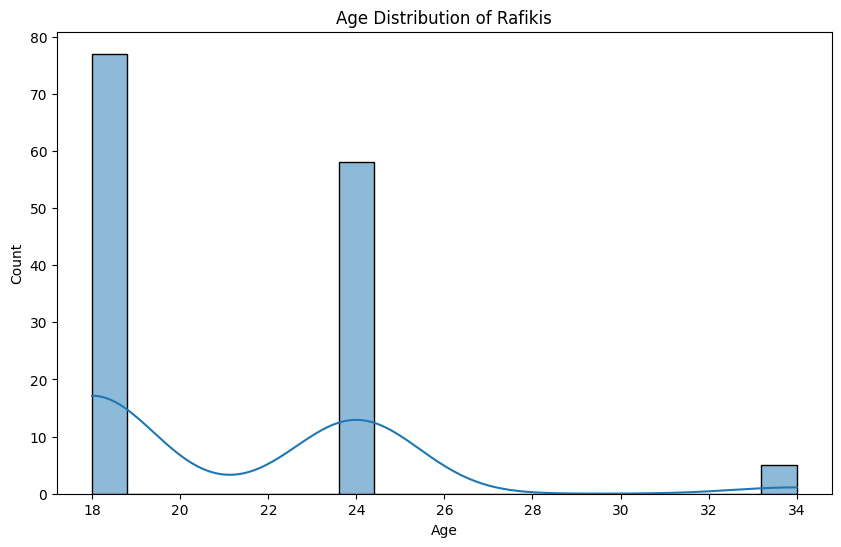

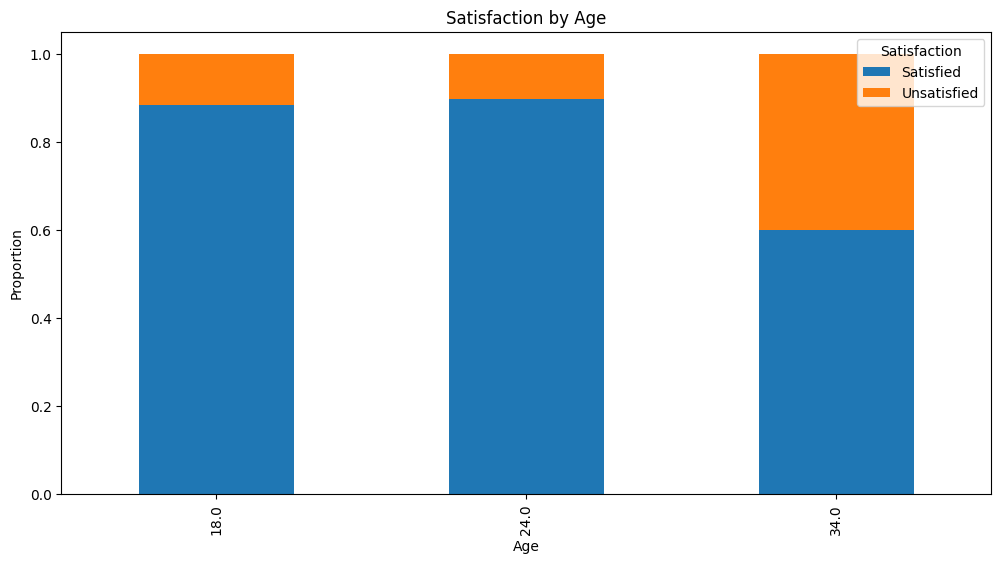

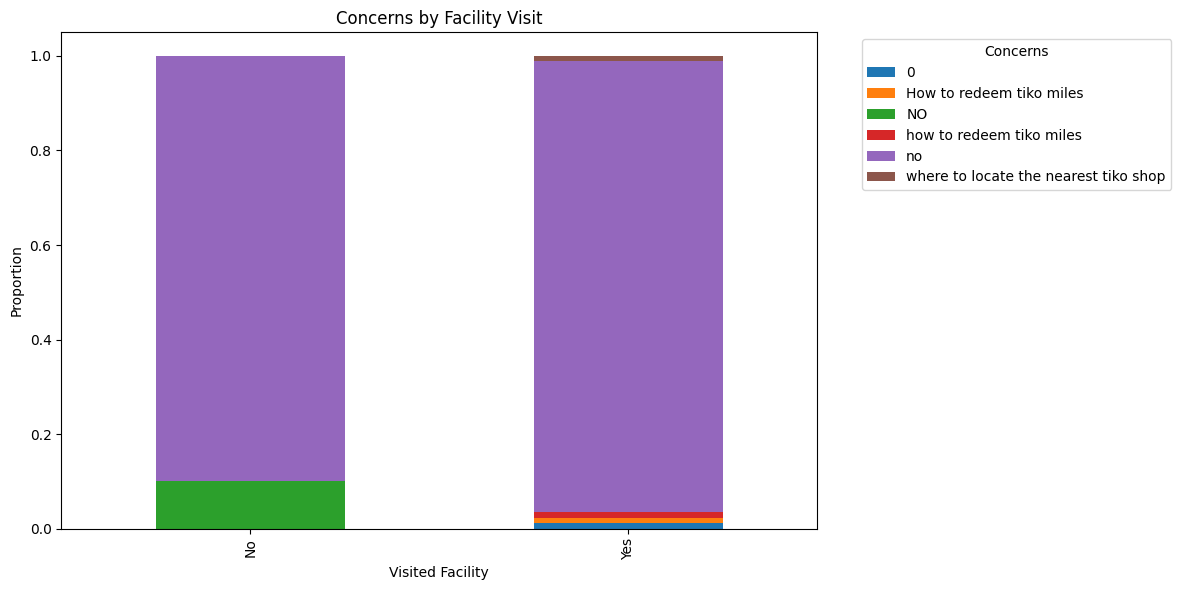

Summary Statistics:
count    140.000000
mean      21.057143
std        3.849267
min       18.000000
25%       18.000000
50%       18.000000
75%       24.000000
max       34.000000
Name: Age, dtype: float64
Correlation between Age and Satisfaction: -0.09


In [42]:
# 1. Counting the number of occurrences of rafikis who did not visit a facility based on available data
no_visit = successful_calls[successful_calls['Visited facility'] == 'No']
no_visit_count = no_visit['Visited facility'].count()

print(f"1. Number of Rafikis who haven't visited a facility: {no_visit_count}")

# 2. Age distribution of Rafikis
plt.figure(figsize=(10, 6))
sns.histplot(data=successful_calls, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Rafikis')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig(r"..\charts\age_distribution.jpg")
plt.show()

# 3. Relationship between age and service satisfaction
successful_calls['Satisfaction'] = successful_calls['Feedback'].apply(lambda x: 'Satisfied' if 'good' in str(x).lower() else 'Unsatisfied')
age_satisfaction = successful_calls.groupby('Age')['Satisfaction'].value_counts(normalize=True).unstack()
age_satisfaction.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Satisfaction by Age')
plt.xlabel('Age')
plt.ylabel('Proportion')
plt.legend(title='Satisfaction')
plt.savefig('../charts/satisfaction_by_age.jpg')
plt.show()

# 4. Patterns in concerns or feedback based on age or facility visits
concerns_by_visit = successful_calls.groupby('Visited facility')['Concerns'].value_counts(normalize=True).unstack()
concerns_by_visit.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Concerns by Facility Visit')
plt.xlabel('Visited Facility')
plt.ylabel('Proportion')
plt.legend(title='Concerns', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../charts/concerns_by_visit.jpg')
plt.show()

# Display summary statistics
print("\
Summary Statistics:")
print(successful_calls['Age'].describe())

# Calculate correlation between age and satisfaction
successful_calls['Satisfaction_Numeric'] = successful_calls['Satisfaction'].map({'Satisfied': 1, 'Unsatisfied': 0})
correlation = successful_calls['Age'].corr(successful_calls['Satisfaction_Numeric'])
print(f"\
Correlation between Age and Satisfaction: {correlation:.2f}")

# Most common concerns and feedback for different age groups
age_groups = pd.cut(successful_calls['Age'], bins=[0, 18, 25, 35, 100], labels=['Under 18', '18-25', '26-35', 'Over 35'])
successful_calls['Age_Group'] = age_groups


The correlation between Age and Satisfaction is -0.09, indicating a very weak negative relationship. This means that as age increases, satisfaction tends to decrease slightly.